In [2]:
import pandas as pd
import numpy as np

In [3]:
tea=pd.read_csv(r"C:\Users\user\Desktop\Research\dataset3.csv")
tea.head()

,Month,Region,Product,Price
0,1,1,5084.836,535.86
1,2,1,4452.424,577.70
2,3,1,3355.617,560.10
3,4,1,4011.551,655.92
4,5,1,6713.225,645.41


In [24]:
tea.Product.value_counts()

5084.836     1
5060.997     1
4141.617     1
4726.078     1
4920.917     1
            ..
14082.713    1
18152.272    1
14554.828    1
20255.888    1
16505.541    1
Name: Product, Length: 180, dtype: int64

In [25]:
tea['label']=tea['Month'].astype(str)+ '('+ tea['Region'].astype(str)+"-" +round(tea['Product'],3).astype(str)+ ","+round(tea['Price'],2).astype(str)+')'



In [26]:
tea.head

<bound method NDFrame.head of      Month  Region    Product   Price                   label
0        1       1   5084.836  535.86    1(1-5084.836,535.86)
1        2       1   4452.424  577.70     2(1-4452.424,577.7)
2        3       1   3355.617  560.10     3(1-3355.617,560.1)
3        4       1   4011.551  655.92    4(1-4011.551,655.92)
4        5       1   6713.225  645.41    5(1-6713.225,645.41)
..     ...     ...        ...     ...                     ...
175      8       3  15851.977  535.80    8(3-15851.977,535.8)
176      9       3  12917.356  552.12   9(3-12917.356,552.12)
177     10       3  12880.104  600.43  10(3-12880.104,600.43)
178     11       3  17800.024  620.98  11(3-17800.024,620.98)
179     12       3  16505.541  529.64  12(3-16505.541,529.64)

[180 rows x 5 columns]>

In [27]:
tea.columns

Index(['Month', 'Region', 'Product', 'Price', 'label'], dtype='object')

In [28]:
tea= tea.rename(columns={'product ': 'Product'})

In [29]:
tea.columns = tea.columns.str.strip()

In [30]:
tea_label=tea['label']

tea.head()

,Month,Region,Product,Price,label
0,1,1,5084.836,535.86,"1(1-5084.836,535.86)"
1,2,1,4452.424,577.70,"2(1-4452.424,577.7)"
2,3,1,3355.617,560.10,"3(1-3355.617,560.1)"
3,4,1,4011.551,655.92,"4(1-4011.551,655.92)"
4,5,1,6713.225,645.41,"5(1-6713.225,645.41)"


In [31]:
tea.label.value_counts()

1(1-5084.836,535.86)      1
6(1-5060.997,531.1)       1
8(1-4141.617,620.0)       1
9(1-4726.078,655.74)      1
10(1-4920.917,660.39)     1
                         ..
2(3-14082.713,605.29)     1
3(3-18152.272,611.08)     1
4(3-14554.828,608.07)     1
5(3-20255.888,569.7)      1
12(3-16505.541,529.64)    1
Name: label, Length: 180, dtype: int64

In [32]:
tea.describe()

,Month,Region,Product,Price
count,180.000000,180.000000,180.000000,180.000000
mean,6.500000,2.000000,8170.923239,550.903722
std,3.461682,0.818774,5423.194031,79.688150
min,1.000000,1.000000,2300.185000,373.840000
25%,3.750000,1.000000,3869.614500,501.677500
50%,6.500000,2.000000,5084.240500,558.090000
75%,9.250000,3.000000,14066.141750,612.352500
max,12.000000,3.000000,20255.888000,744.520000


In [33]:
tea.head()

,Month,Region,Product,Price,label
0,1,1,5084.836,535.86,"1(1-5084.836,535.86)"
1,2,1,4452.424,577.70,"2(1-4452.424,577.7)"
2,3,1,3355.617,560.10,"3(1-3355.617,560.1)"
3,4,1,4011.551,655.92,"4(1-4011.551,655.92)"
4,5,1,6713.225,645.41,"5(1-6713.225,645.41)"


In [34]:
tea.drop(['label'], axis=1, inplace=True)

In [35]:
tea.head()

,Month,Region,Product,Price
0,1,1,5084.836,535.86
1,2,1,4452.424,577.70
2,3,1,3355.617,560.10
3,4,1,4011.551,655.92
4,5,1,6713.225,645.41


In [36]:
import sklearn
from sklearn.preprocessing import StandardScaler
standardizer= StandardScaler()
standardizer.fit(tea)
std_X=standardizer.transform(tea)
std_tea=pd.DataFrame(std_X, columns=tea.columns)

In [37]:
std_tea.describe()

,Month,Region,Product,Price
count,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02
mean,1.480297e-17,9.868649e-18,-2.763222e-16,-1.154632e-15
std,1.002789e+00,1.002789e+00,1.002789e+00,1.002789e+00
min,-1.593255e+00,-1.224745e+00,-1.085544e+00,-2.228156e+00
25%,-7.966275e-01,-1.224745e+00,-7.953444e-01,-6.194589e-01
50%,0.000000e+00,0.000000e+00,-5.707509e-01,9.043155e-02
75%,7.966275e-01,1.224745e+00,1.090070e+00,7.732666e-01
max,1.593255e+00,1.224745e+00,2.234601e+00,2.436452e+00


<IPython.core.display.Javascript object>


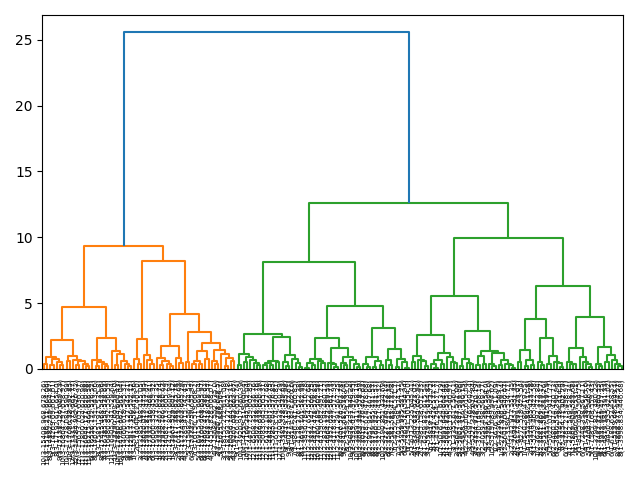

In [38]:
from scipy.cluster .hierarchy import linkage, dendrogram
linkage_matrix=linkage(std_tea, method='ward', metric='euclidean')
import matplotlib.pyplot as plt
%matplotlib notebook
fig, axs=plt.subplots()
dendrogram(linkage_matrix, labels=tea_label.to_numpy())
plt.tight_layout()
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering
agg_clust=AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
agg_clusters=agg_clust.fit_predict(std_tea)
agg_result=pd.DataFrame({"label":tea_label, "agg_cluster":agg_clusters}).sort_values('agg_cluster')
agg_result.head()

,label,agg_cluster
0,"1(1-5084.836,535.86)",0
25,"2(2-3384.7,534.77)",0
26,"3(2-2607.706,540.07)",0
28,"5(2-5962.347,599.06)",0
109,"2(1-3993.644,604.44)",0


In [54]:
pd.set_option("max_columns", 2) #Showing only two columns
pd.set_option("max_rows", None)
agg_result

,label,agg_cluster
0,"1(1-5084.836,535.86)",0
25,"2(2-3384.7,534.77)",0
26,"3(2-2607.706,540.07)",0
28,"5(2-5962.347,599.06)",0
109,"2(1-3993.644,604.44)",0
36,"1(1-4819.24,573.72)",0
37,"2(1-4146.244,577.7)",0
38,"3(1-5647.283,571.06)",0
39,"4(1-5338.195,540.97)",0
87,"4(2-4843.486,554.0)",0


In [68]:
from sklearn.cluster import KMeans
Kmeans_object=KMeans(n_clusters=5, random_state=1240)
Kmeans_object.fit(std_tea)
Kmeans_clusters=Kmeans_object.predict(std_tea)
Kmeans_results=pd.DataFrame({"label":tea_label, "Kmeans_cluster":Kmeans_clusters})
Kmeans_results.head()

,label,Kmeans_cluster
0,"1(1-5084.836,535.86)",3
1,"2(1-4452.424,577.7)",3
2,"3(1-3355.617,560.1)",3
3,"4(1-4011.551,655.92)",3
4,"5(1-6713.225,645.41)",3


In [71]:
pd.set_option("max_columns", 2) #Showing only two columns
pd.set_option("max_rows", None)
Kmeans_results.head()

,label,Kmeans_cluster
0,"1(1-5084.836,535.86)",3
1,"2(1-4452.424,577.7)",3
2,"3(1-3355.617,560.1)",3
3,"4(1-4011.551,655.92)",3
4,"5(1-6713.225,645.41)",3


In [67]:
Kmeans_results.describe()

,Kmeans_cluster
count,180.000000
mean,1.922222
std,1.343121
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [72]:
Kmeans_object.labels_

array([3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 0, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 4, 4, 4])

In [75]:
cluster_centroids=pd.DataFrame(standardizer.inverse_transform(Kmeans_object.cluster_centers_),columns=tea.columns)
cluster_centroids.to_csv("best_centroids.csv")
cluster_centroids

,Month,...,Price
0,5.750000,...,430.841563
1,9.956522,...,558.689348
2,3.818182,...,585.617879
3,3.285714,...,568.406190
4,9.777778,...,610.280741


In [77]:
wss={}
for K in range(1, 40):
    Kmeans_loop=KMeans(n_clusters=K, n_init=30, n_jobs=2, random_state=1000, verbose=0).fit(std_tea)
    clusters=Kmeans_loop.labels_
    wss[K]=Kmeans_loop.inertia_

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be remov

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be remov

<IPython.core.display.Javascript object>


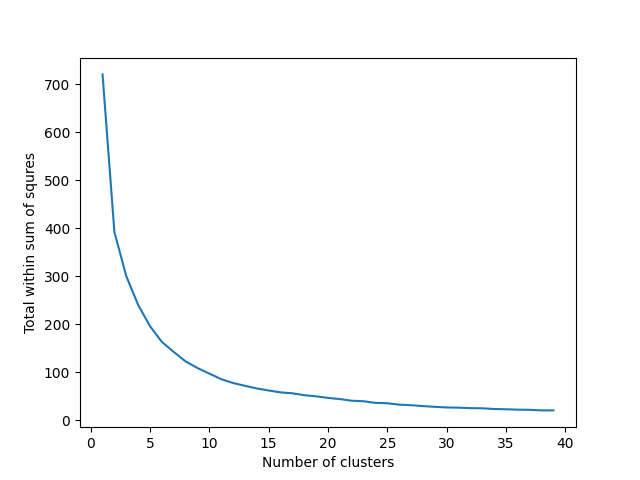

In [80]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(list(wss.keys()),list(wss.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squres')
plt.show()

Automatically created module for IPython interactive environment


<IPython.core.display.Javascript object>


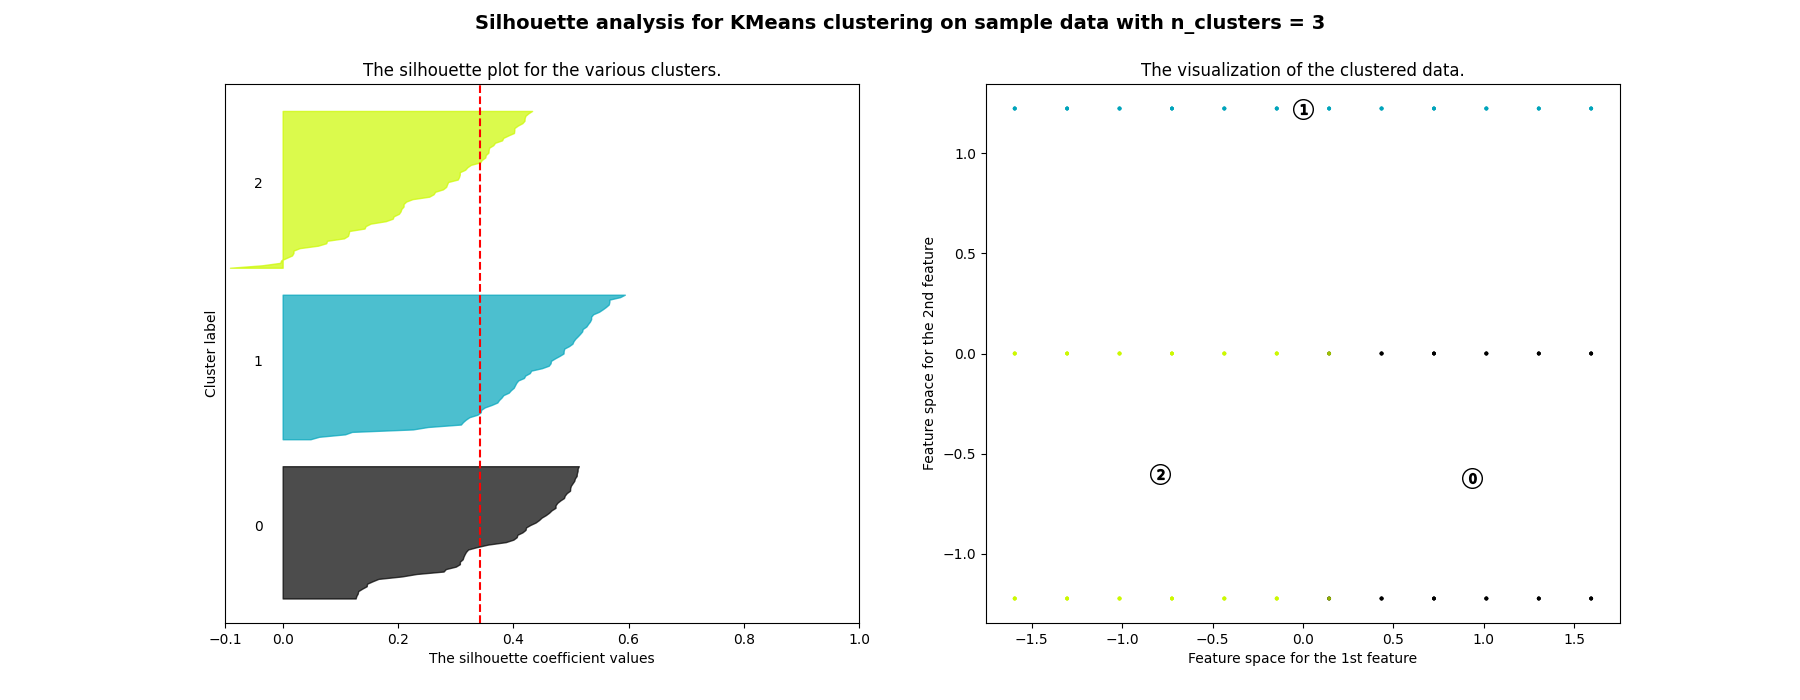

For n_clusters = 3 The average silhouette_score is : 0.34237688987198917


<IPython.core.display.Javascript object>


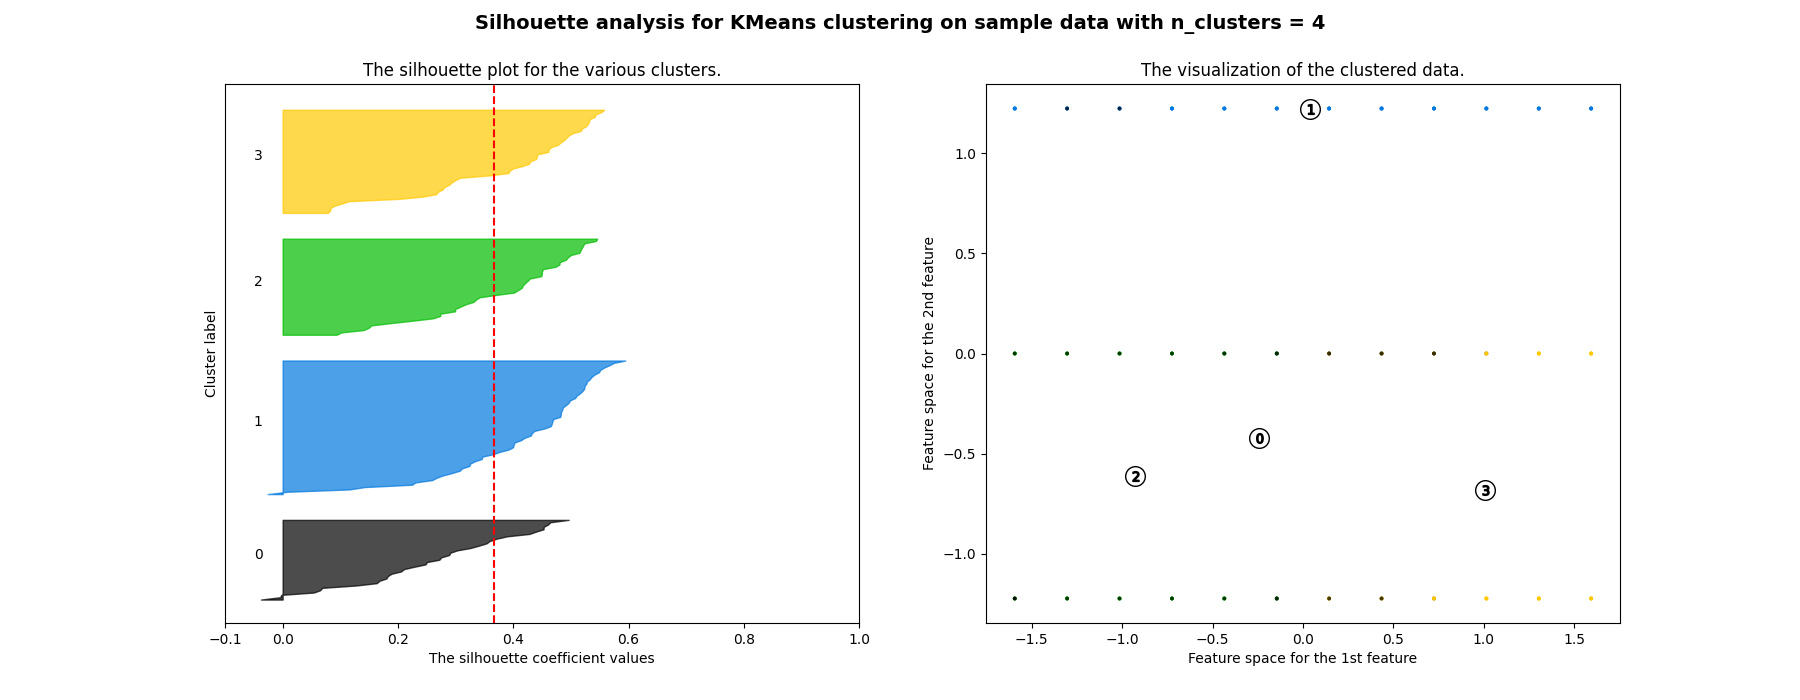

For n_clusters = 4 The average silhouette_score is : 0.3660077570941717


<IPython.core.display.Javascript object>


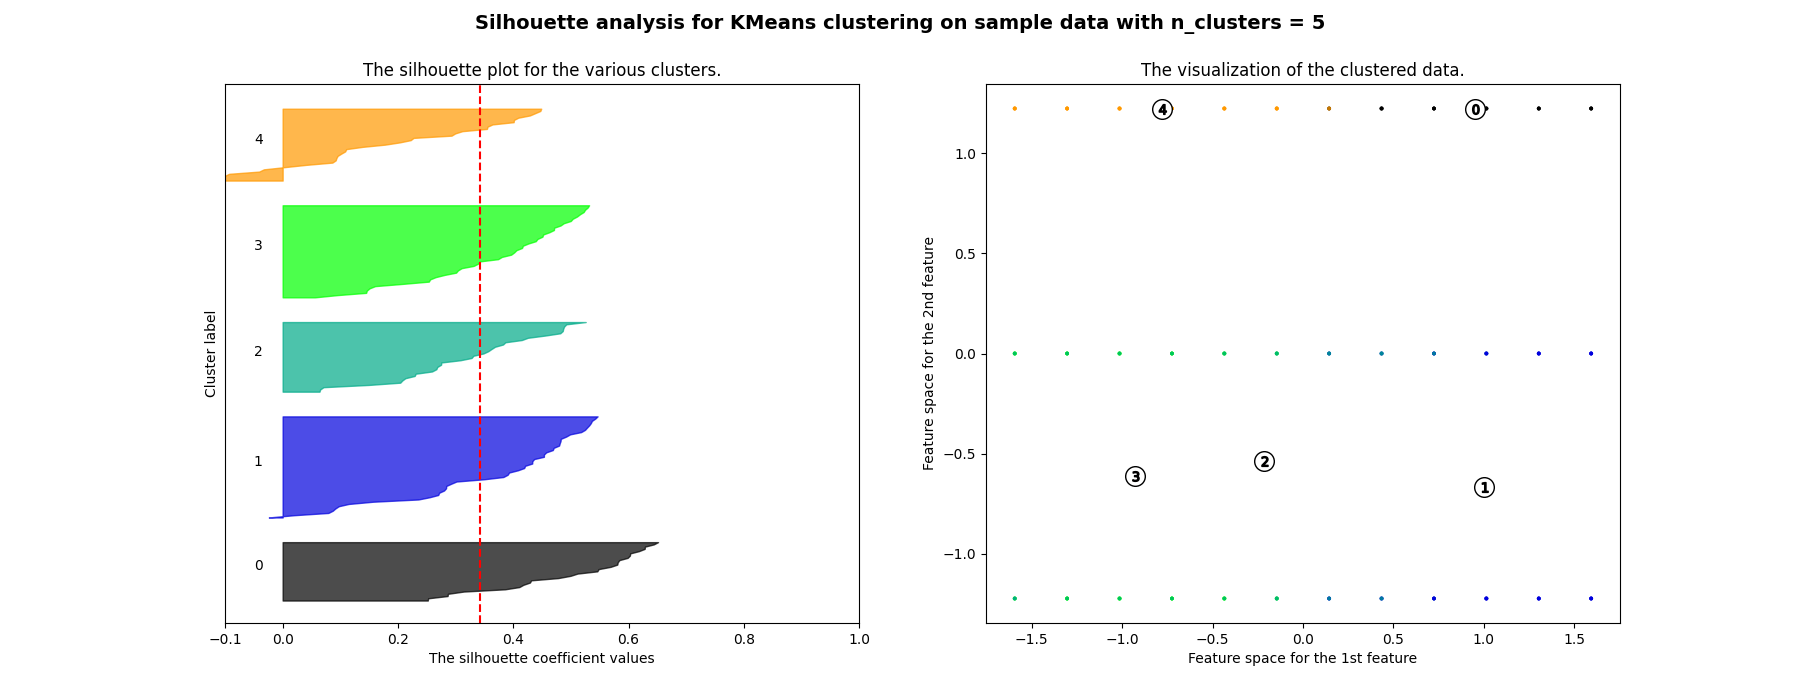

For n_clusters = 5 The average silhouette_score is : 0.3424864915363445


<IPython.core.display.Javascript object>


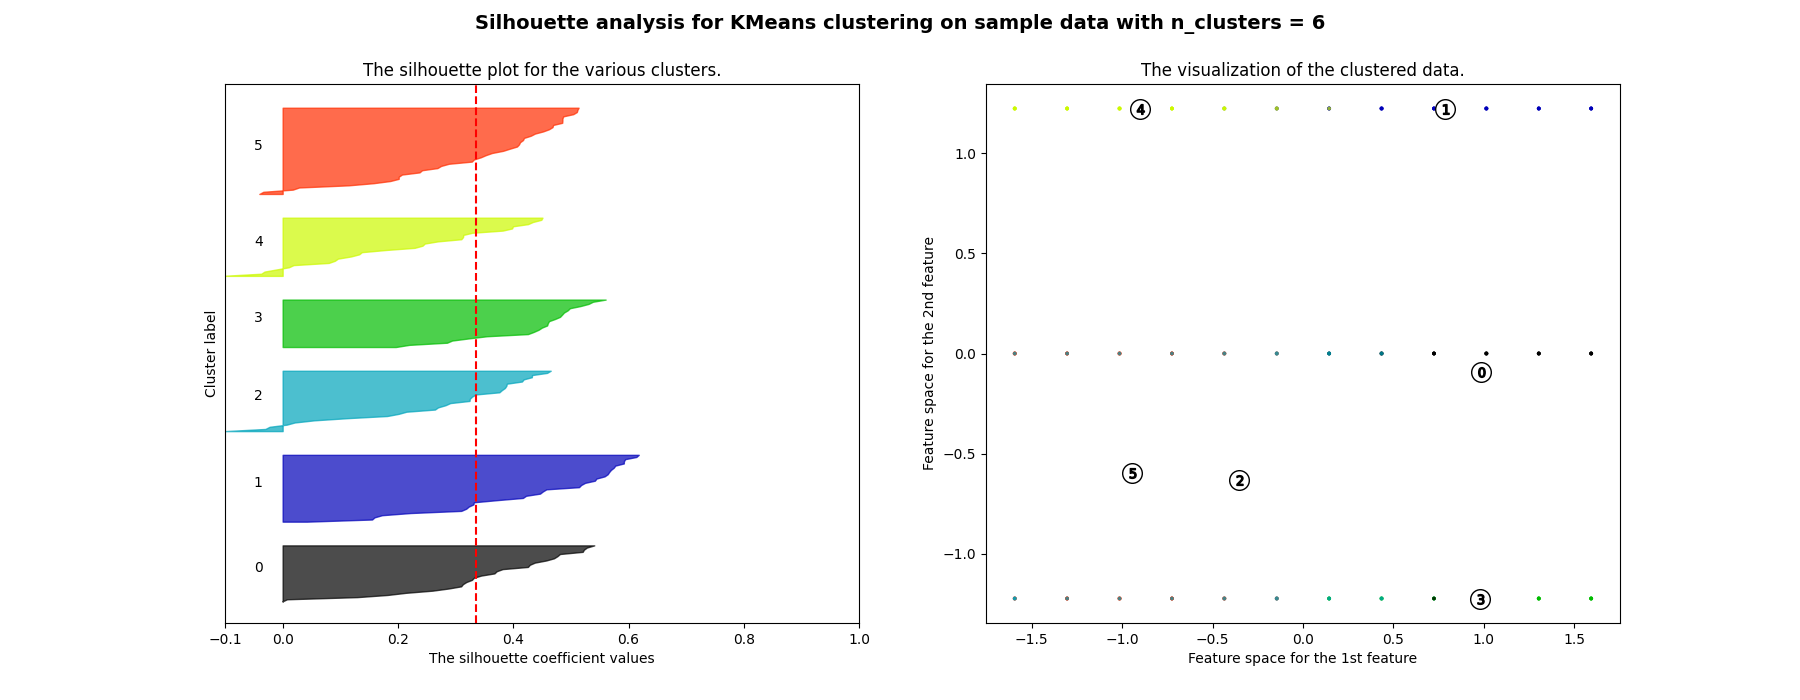

For n_clusters = 6 The average silhouette_score is : 0.33546307320036556


<IPython.core.display.Javascript object>


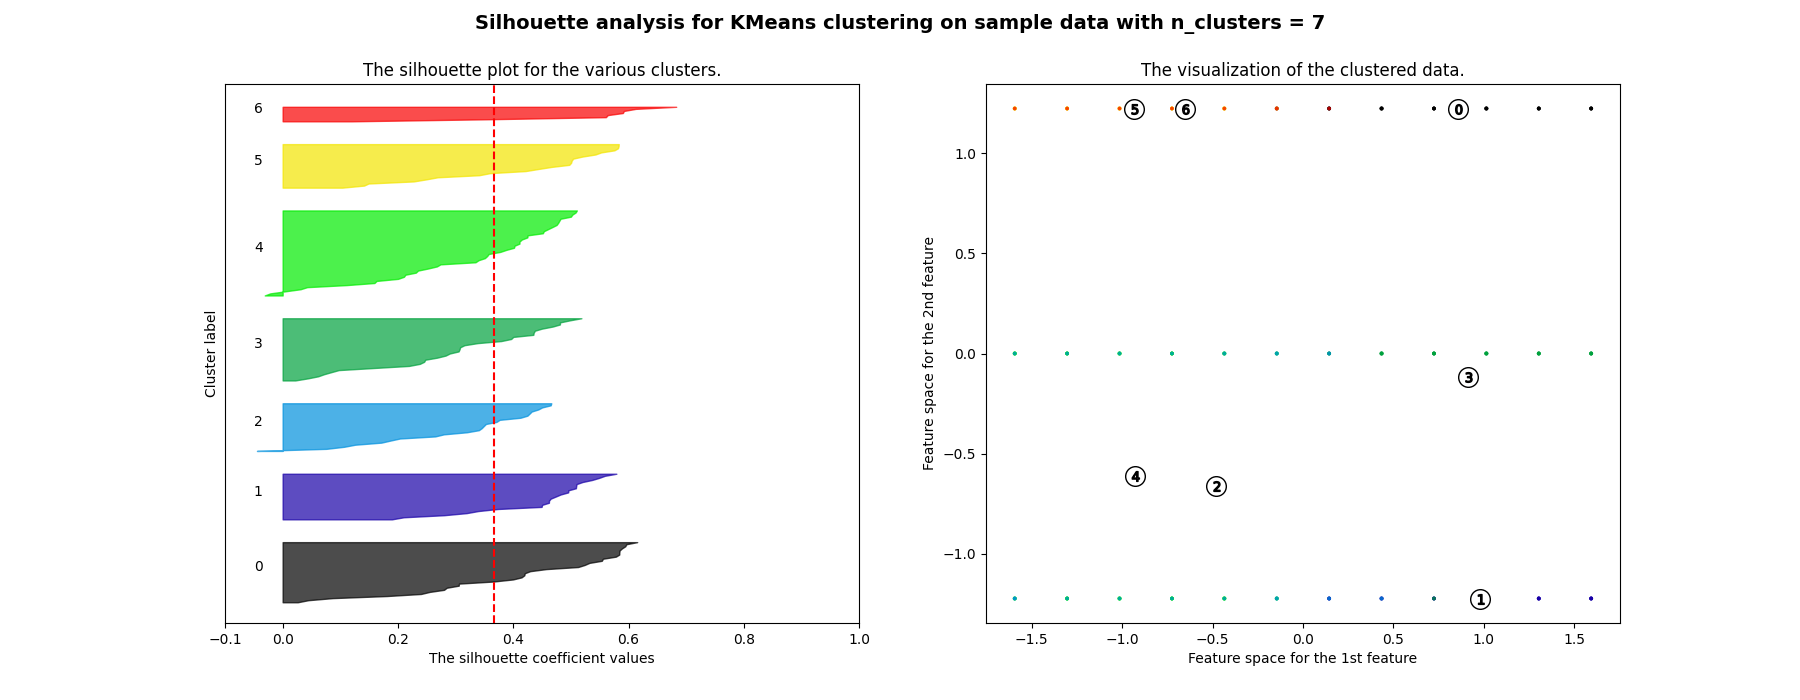

For n_clusters = 7 The average silhouette_score is : 0.3658963220685963


<IPython.core.display.Javascript object>


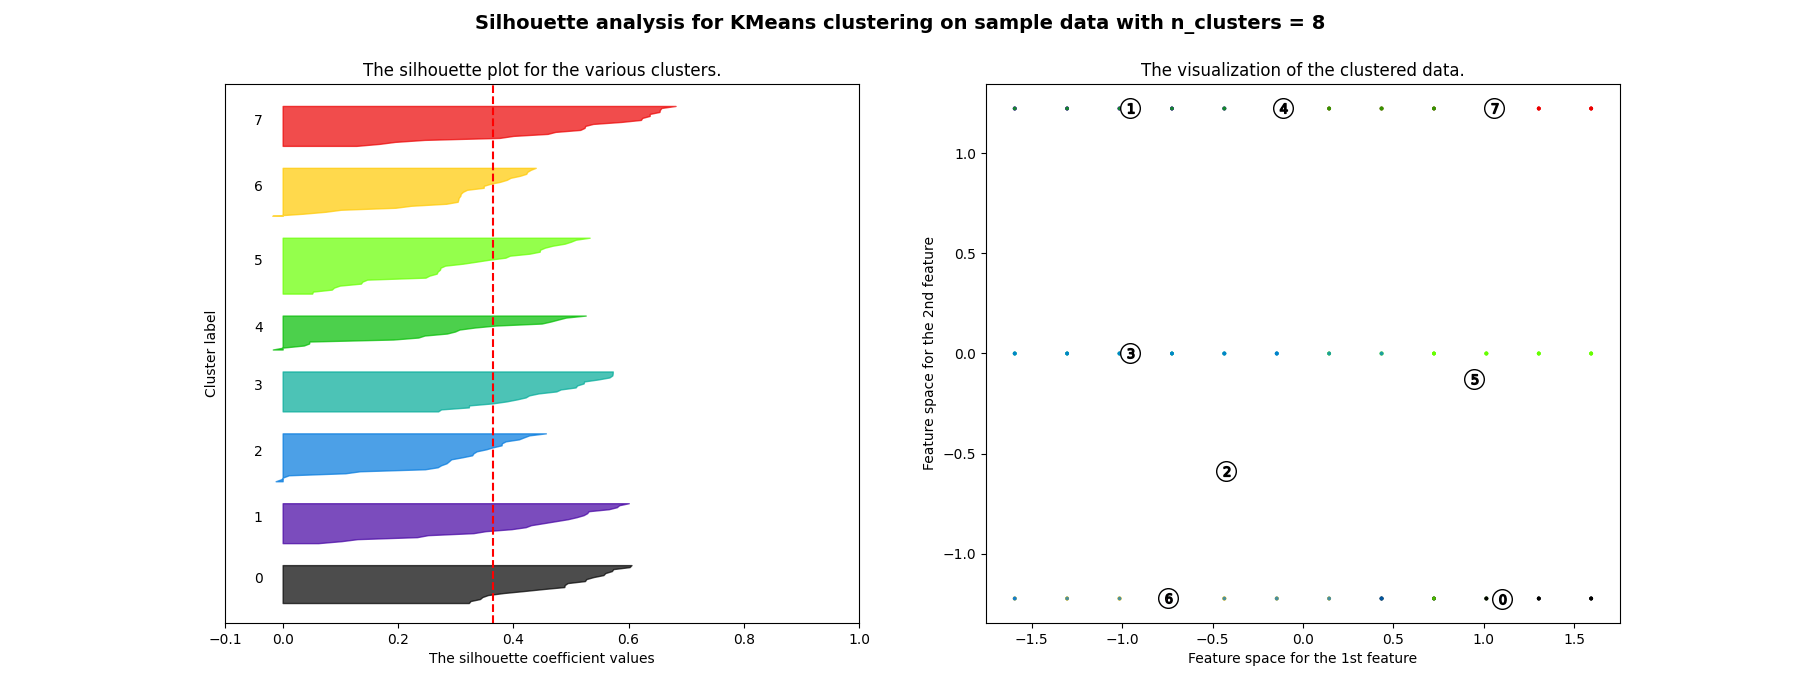

For n_clusters = 8 The average silhouette_score is : 0.3641056816950186


<IPython.core.display.Javascript object>


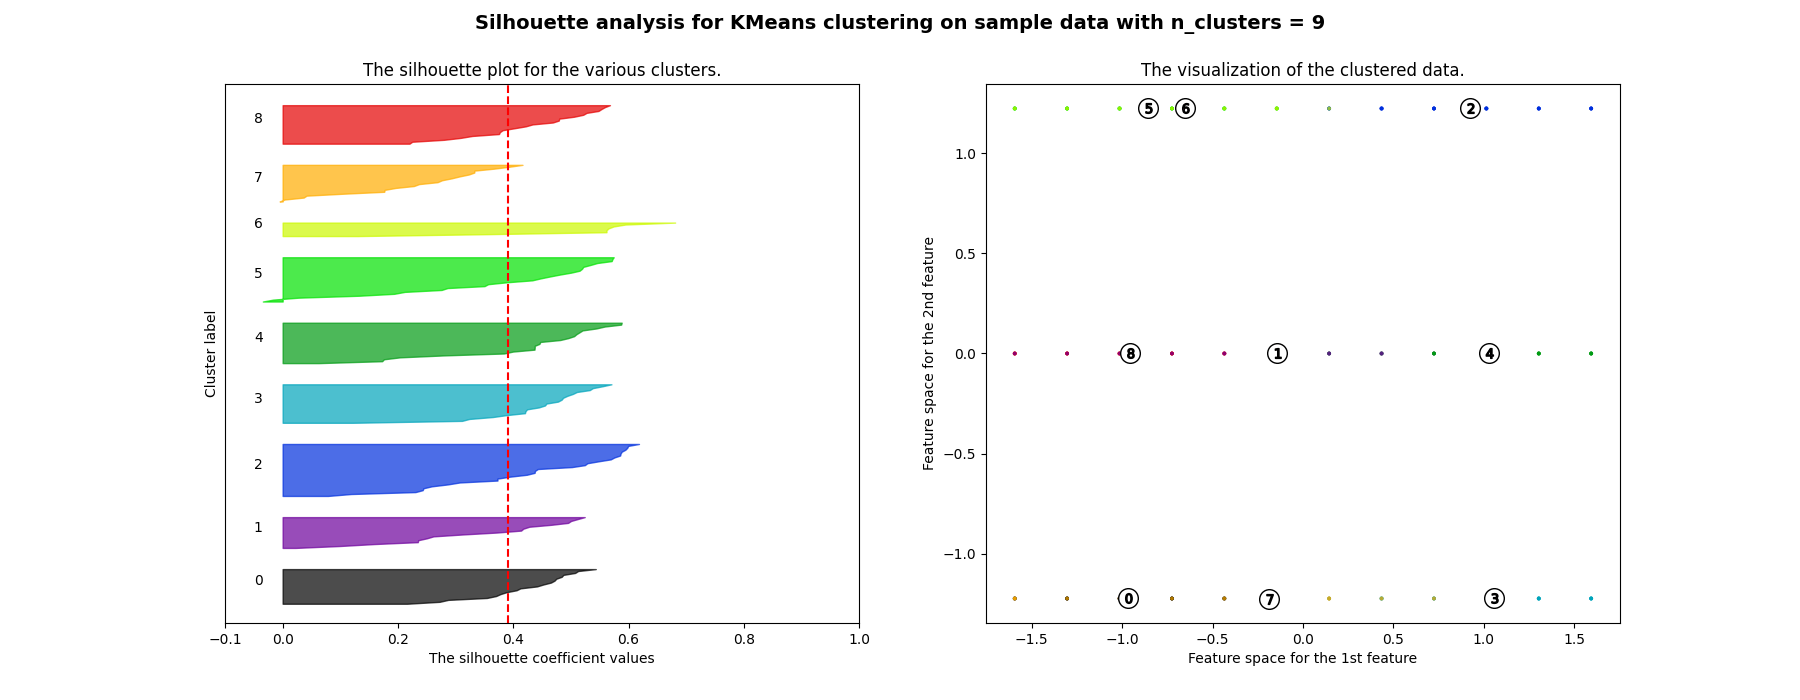

For n_clusters = 9 The average silhouette_score is : 0.3917012234387904


<IPython.core.display.Javascript object>


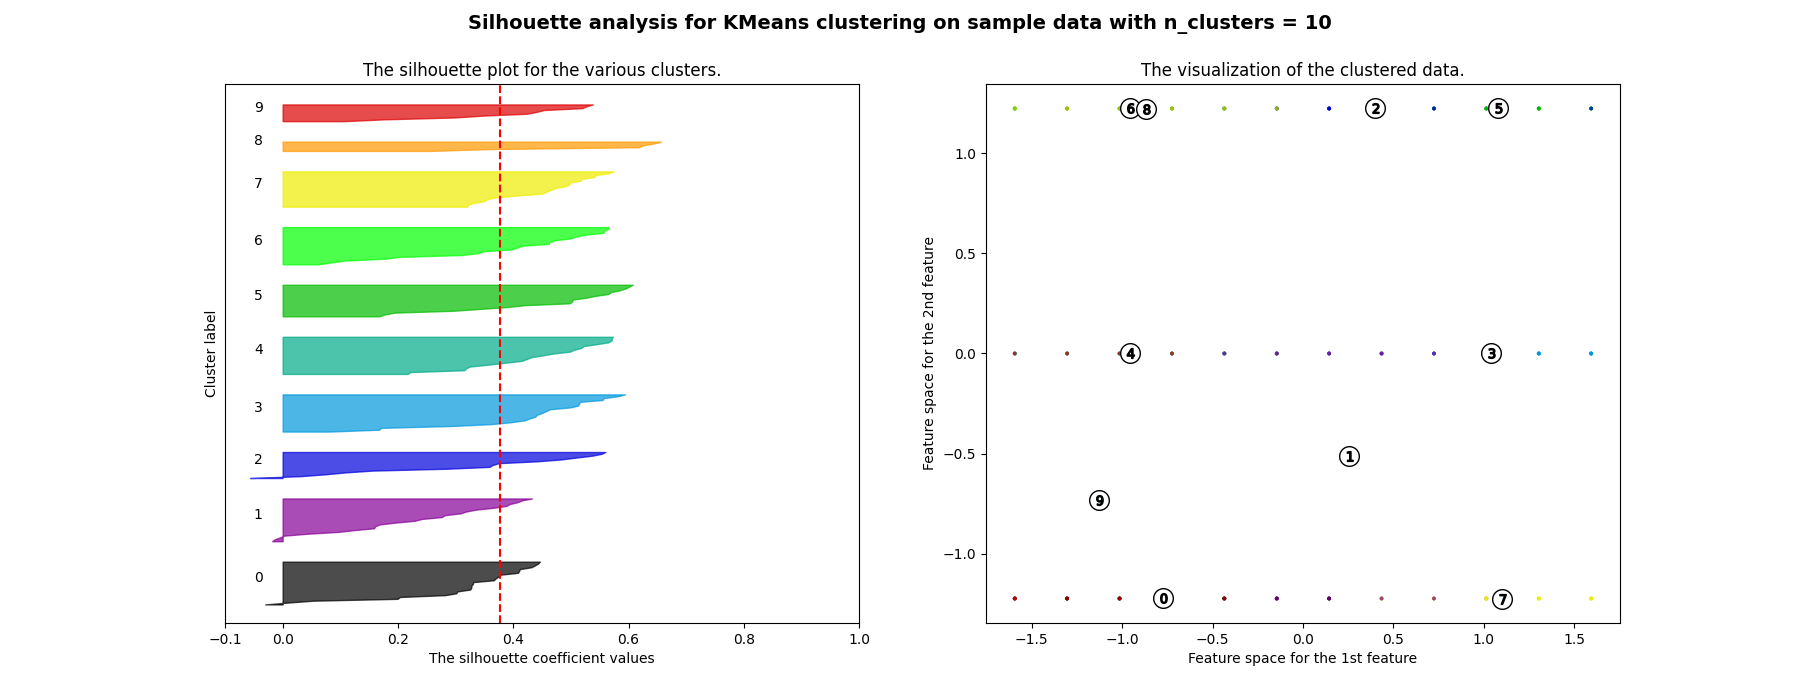

For n_clusters = 10 The average silhouette_score is : 0.37644310514707574


In [86]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility
X=std_tea.values

range_n_clusters = [3, 4, 5, 6, 7 ,8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [89]:
best_Kmeans=KMeans(n_clusters=7, random_state=1240)
best_Kmeans.fit(std_tea)
best_Kmeans_labels=best_Kmeans.predict(std_tea)


In [93]:
Kmeans_results=pd.DataFrame({"label":tea_label, "Kmeans_cluster":best_Kmeans_labels})
pd.set_option("max_columns", 2) #Showing only two columns
pd.set_option("max_rows", None)
Kmeans_results.head()

,label,Kmeans_cluster
0,"1(1-5084.836,535.86)",3
1,"2(1-4452.424,577.7)",3
2,"3(1-3355.617,560.1)",3
3,"4(1-4011.551,655.92)",3
4,"5(1-6713.225,645.41)",3


In [94]:
pd.set_option("max_columns", 2) #Showing only two columns
pd.set_option("max_rows", None)
Kmeans_results.head()

,label,Kmeans_cluster
0,"1(1-5084.836,535.86)",3
1,"2(1-4452.424,577.7)",3
2,"3(1-3355.617,560.1)",3
3,"4(1-4011.551,655.92)",3
4,"5(1-6713.225,645.41)",3


In [96]:
Kmeans_results.head

<bound method NDFrame.head of                       label  Kmeans_cluster
0      1(1-5084.836,535.86)               3
1       2(1-4452.424,577.7)               3
2       3(1-3355.617,560.1)               3
3      4(1-4011.551,655.92)               3
4      5(1-6713.225,645.41)               3
5      6(1-7248.358,567.11)               3
6      7(1-5869.909,533.68)               0
7      8(1-4138.376,572.38)               0
8       9(1-4219.15,555.98)               0
9      10(1-4559.119,600.4)               0
10    11(1-5502.338,626.76)               0
11    12(1-6508.352,636.76)               0
12    1(3-13334.407,628.74)               2
13    2(3-10111.273,630.63)               2
14     3(3-7317.388,625.78)               2
15    4(3-13289.415,742.49)               2
16     5(3-15682.56,744.52)               2
17    6(3-15333.759,655.97)               2
18     7(3-16156.519,668.2)               2
19    8(3-14882.249,664.87)               5
20     9(3-14269.69,661.61)               5
21